In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [3]:
df =pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm =LinearRegression()
lm

LinearRegression()

In [6]:
X=df[['highway-mpg']]
Y=df[['price']]

In [7]:
lm.fit(X,Y)

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [12]:
lm.intercept_ #intercept

array([38423.30585816])

In [13]:
lm.coef_ #slope

array([[-821.73337832]])

In [14]:
lm1=LinearRegression()
lm1

LinearRegression()

In [15]:
X=df[['engine-size']]
Y=df[['price']]

In [16]:
lm1.fit(X,Y)

LinearRegression()

In [18]:
lm1.intercept_

array([-7963.33890628])

In [19]:
lm1.coef_

array([[166.86001569]])

In [20]:
# Yhat=166.86*X-7963.33

<h2>Multiple Linear Regression</h2>

In [21]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [22]:
lm.fit(Z,Y)

LinearRegression()

In [23]:
lm.intercept_

array([-15806.62462633])

In [24]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

Yhat=-15806.62+53.49*horsepower+4.7*curb-weight+81.53*engine-size+36.05*highway-mpg

In [25]:
lm2=LinearRegression()
lm2

LinearRegression()

In [26]:
X=df[['price']]
Z=df[['normalized-losses','highway-mpg']]


In [27]:
lm2.fit(Z,X)


LinearRegression()

In [28]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

<h2>Model evaluation using Visualization</h2>

In [30]:
import seaborn as sns
%matplotlib inline


(0.0, 48177.3253358059)

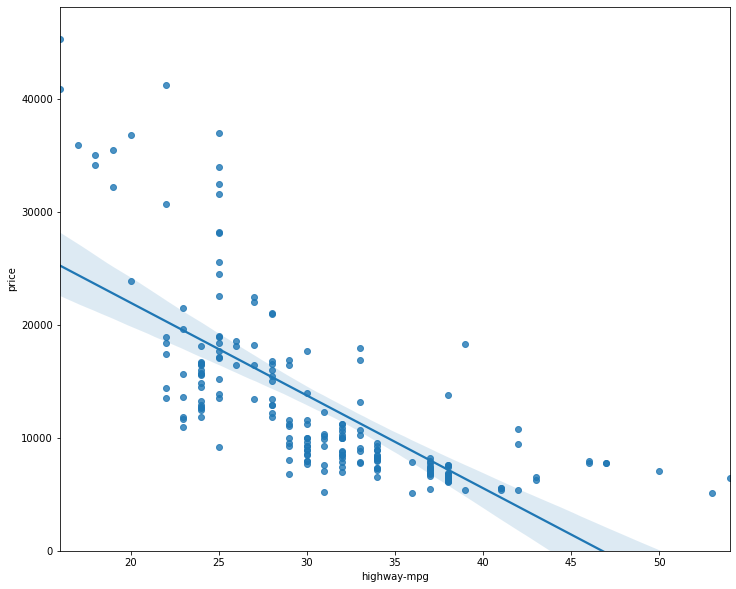

In [31]:
#Regression plot
width=12 
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

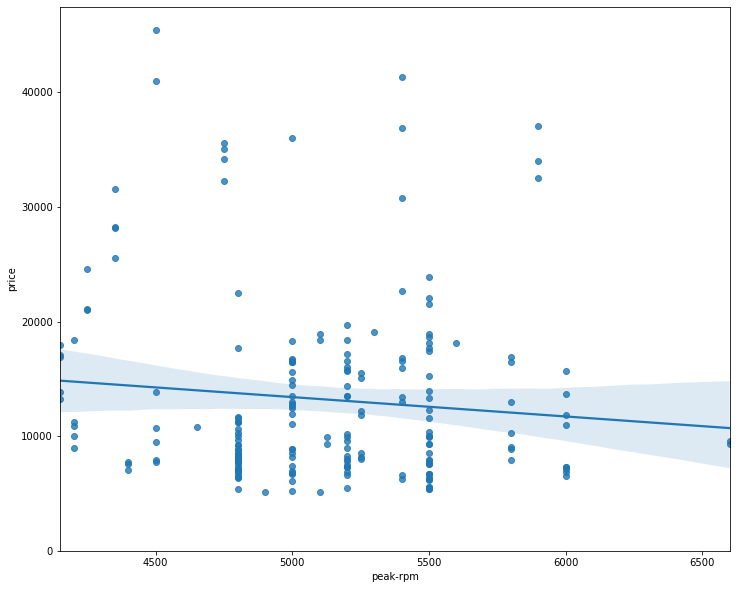

In [35]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [37]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


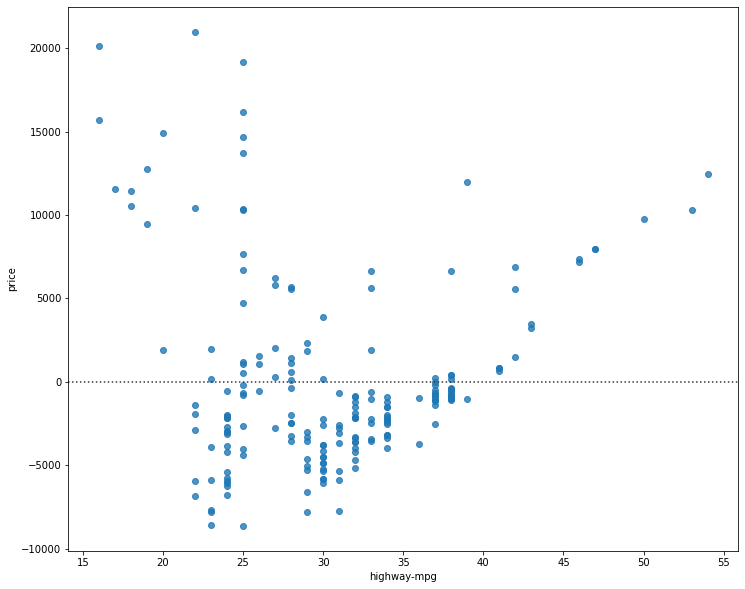

In [39]:
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [44]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_hat = lm.predict(Z)


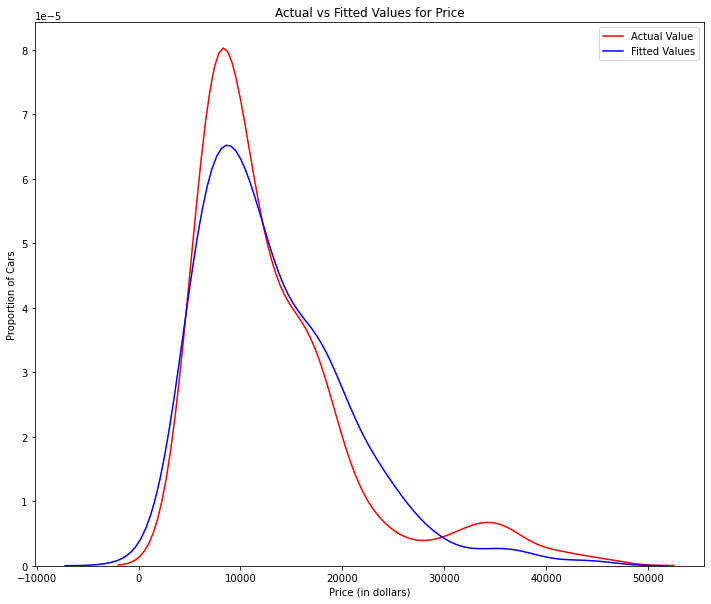

In [45]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>Part 3: Polynomial Regression and Pipelines</h2>

In [46]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [47]:
x = df['highway-mpg']
y = df['price']

In [48]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


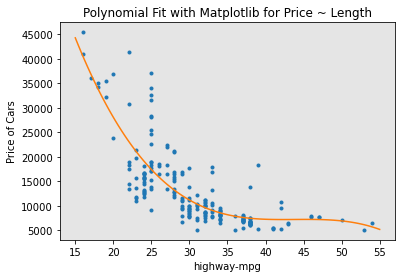

In [49]:
#Plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [50]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


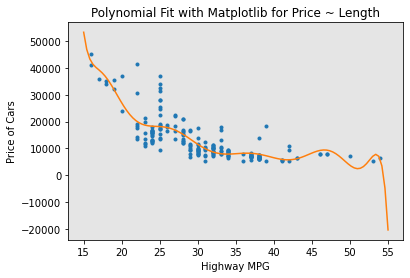

In [52]:
#Create 11 orders
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')


In [53]:
from sklearn.preprocessing import PolynomialFeatures


In [54]:
#create a polynomial feature object of degree 2
pr =PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [56]:
Z_pr=pr.fit_transform(Z)

In [57]:
Z.shape

(201, 4)

In [58]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
#create a tuple with 'name'/estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [61]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

In [64]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27
